# MUNIC - Governo e sua relação com a agricultura familiar
<hr>
<p style="text-align: justify;">
<strong>Este estudo</strong> consiste na leitura, manipulação e análise de uma base de dados específica.
</p>
<p style="text-align: justify;">
<strong>A Pesquisa de Informações Básicas Municipais - MUNIC</strong> é um levantamento pormenorizado de registros administrativos sobre a estrutura, a dinâmica e o funcionamento das instituições públicas municipais, em especial a prefeitura, compreendendo, também, diferentes aspectos das políticas públicas setoriais sob responsabilidade dessa esfera governamental. Seus resultados permitem a consolidação de uma base de dados estatísticos e cadastrais atualizados, com indicadores de avaliação e monitoramento dos quadros institucional e administrativo das municipalidades sob a perspectiva da gestão.
</p>
<p style="text-align: justify;">
Será realizada uma análise baseada na base de dados do MUNIC de <strong>2023</strong>. E essa análise tem como objetivo principal gerar <strong>conhecimento</strong>.
</p>

# O que será analisado ? 
<hr>
<p style="text-align: justify;">
Com base na coleta de dados das colunas relacionadas aos Serviços de Assistência Técnica e Extensão Rural para agricultores familiares e povos de comunidades tradicionais <strong>(MSAN01)</strong>, será analisada a distribuição dos recursos por esfera política. Isso inclui identificar se os recursos são provenientes do governo federal <strong>(MSAN171211)</strong>, do governo estadual <strong>(MSAN171212)</strong>, do próprio município <strong>(MSAN171213)</strong> ou se há contribuição conjunta de mais de uma dessas esferas.
</p>
<p style="text-align: justify;">
Além disso, será calculada a média da quantidade de municípios que recebem recursos disponibilizados por cada esfera e sua distribuição nas diferentes regiões. Será analisada, especificamente, a média do "Sim", "Não" e "Sem dados" em resposta ao recebimento dos recursos federais destinados a cada região, identificando qual região tem mais municípios que recebem mais recursos federais e qual recebem menos.
</p>

### Importação do pandas e o arquivo original
<hr>

In [4]:
#Importando a biblioteca pandas
import pandas as pd

In [16]:
import os
print(os.getcwd())

C:\Users\Suerdo\MUNIC_files\notebooks


In [18]:
#Importando o arquivo original (sem qualquer modificação)
data_original = pd.ExcelFile("../datasets/Base_MUNIC_2023 (1).xlsx")

In [20]:
#Visualização dos nomes das tabelas da Base de Dados do MUNIC - 2023
data_original.sheet_names

['Dicionário',
 'Recursos humanos',
 'Assistência Social',
 'Trabalho e Inclusão Produtiva',
 'Segurança Alimentar',
 'Política para Mulheres',
 'Segurança Pública',
 'Direitos Humanos',
 'Primeira Infância']

### Início do Projeto Multidisciplinar II 
<hr>

In [22]:
#Importando o arquivo já modificado
data_modificado = pd.ExcelFile("../datasets/Base_MUNIC_2023_atualizada (1).xlsx")

In [24]:
#Listando o nomes das abas, nesse caso apenas o de Segurança Alimentar, já que iremos apenas trabalhar com dados dessa aba.
data_modificado.sheet_names

['Segurança Alimentar']

In [28]:
data_modificado = pd.read_excel("../datasets/Base_MUNIC_2023_atualizada (1).xlsx", sheet_name="Segurança Alimentar")

In [30]:
#Exibindo a base de dados tratada
data_modificado

,CodMun,UF,Regiao,MSAN01,MSAN1712,MSAN171211,MSAN171212,MSAN171213
0,1100015,RO,1 - Norte,Não possui estrutura,Sim,Não,Não,Sim
1,1100023,RO,1 - Norte,Setor subordinado a outra secretaria,Sim,Não,Não,Sim
2,1100031,RO,1 - Norte,Não possui estrutura,Sim,Não,Sim,Sim
3,1100049,RO,1 - Norte,Setor subordinado diretamente à chefia do Exec...,Sim,Não,Sim,Não
4,1100056,RO,1 - Norte,Não possui estrutura,Sim,Sim,Não,Sim
...,...,...,...,...,...,...,...,...
5565,5222005,GO,5 - Centro-Oeste,Não possui estrutura,Não,-,-,-
5566,5222054,GO,5 - Centro-Oeste,Não possui estrutura,Não,-,-,-
5567,5222203,GO,5 - Centro-Oeste,Não possui estrutura,Sim,Não,Sim,Não
5568,5222302,GO,5 - Centro-Oeste,Setor subordinado a outra secretaria,Sim,Não,Sim,Não


In [32]:
#Removendo os números que aparecem na região
data_modificado['Regiao'] = data_modificado['Regiao'].str.split('-').str[1]

In [34]:
data_modificado

,CodMun,UF,Regiao,MSAN01,MSAN1712,MSAN171211,MSAN171212,MSAN171213
0,1100015,RO,Norte,Não possui estrutura,Sim,Não,Não,Sim
1,1100023,RO,Norte,Setor subordinado a outra secretaria,Sim,Não,Não,Sim
2,1100031,RO,Norte,Não possui estrutura,Sim,Não,Sim,Sim
3,1100049,RO,Norte,Setor subordinado diretamente à chefia do Exec...,Sim,Não,Sim,Não
4,1100056,RO,Norte,Não possui estrutura,Sim,Sim,Não,Sim
...,...,...,...,...,...,...,...,...
5565,5222005,GO,Centro,Não possui estrutura,Não,-,-,-
5566,5222054,GO,Centro,Não possui estrutura,Não,-,-,-
5567,5222203,GO,Centro,Não possui estrutura,Sim,Não,Sim,Não
5568,5222302,GO,Centro,Setor subordinado a outra secretaria,Sim,Não,Sim,Não


In [40]:
#Mudando os nomes das colunas MSAN01, MSAN1712, MSAN171211, MSAN171212, MSAN171213
data_modificado = data_modificado.rename(columns={'MSAN01':'orgao_gestor', 'MSAN1712':'recebe_recurso', 'MSAN171211':'recurso_federal', 'MSAN171212' : 'recurso_estadual', 'MSAN171213': 'recurso_municipal'})

In [42]:
data_modificado

,CodMun,UF,Regiao,orgao_gestor,recebe_recurso,recurso_federal,recurso_estadual,recurso_municipal
0,1100015,RO,Norte,Não possui estrutura,Sim,Não,Não,Sim
1,1100023,RO,Norte,Setor subordinado a outra secretaria,Sim,Não,Não,Sim
2,1100031,RO,Norte,Não possui estrutura,Sim,Não,Sim,Sim
3,1100049,RO,Norte,Setor subordinado diretamente à chefia do Exec...,Sim,Não,Sim,Não
4,1100056,RO,Norte,Não possui estrutura,Sim,Sim,Não,Sim
...,...,...,...,...,...,...,...,...
5565,5222005,GO,Centro,Não possui estrutura,Não,-,-,-
5566,5222054,GO,Centro,Não possui estrutura,Não,-,-,-
5567,5222203,GO,Centro,Não possui estrutura,Sim,Não,Sim,Não
5568,5222302,GO,Centro,Setor subordinado a outra secretaria,Sim,Não,Sim,Não


### Abordagem para facilitar a análise quantitativa da coluna: orgao_gestor
<hr>
A coluna <stron>"orgao_gestor"</stron> apresenta diversas informações categóricas que se repetem, o que pode dificultar análises quantitativas. Para simplificar esse processo, cada categoria será mapeada para um valor numérico, conforme a escala definida abaixo:


<br>
-1: <strong> Não possui estrutura</strong>
<br>
<br>
0: <strong> Setor subordinado a outra secretaria</strong>
<br>
<br>
1: <strong> Câmara Intersetorial de Segurança Alimentar e Nutricional</strong>
<br>
<br>
2: <strong> Secretaria municipal em conjunto com outras políticas setoriais</strong>
<br>
<br>
3: <strong> Setor subordinado diretamente à chefia do Executivo</strong>
<br>
<br>
4: <strong> Secretaria municipal exclusiva</strong>
<br>
<br>
5: <strong> Não informou</strong>
<br>
<br>
6:<strong> Órgão da administração indireta</strong>
<br>
<br>

Essa transformação facilitará a manipulação e análise dos dados, permitindo identificar padrões e realizar comparações de forma mais eficiente.

In [44]:
repetidos_orgao_gestor = data_modificado['orgao_gestor'].value_counts()
print(repetidos_orgao_gestor)

orgao_gestor
Não possui estrutura                                               2765
Setor subordinado a outra secretaria                               2433
Câmara Intersetorial de Segurança Alimentar e Nutricional           130
Secretaria municipal em conjunto com outras políticas setoriais     115
Setor subordinado diretamente à chefia do Executivo                 101
Secretaria municipal exclusiva                                       18
Não informou                                                          6
Órgão da administração indireta                                       2
Name: count, dtype: int64


In [46]:
# Definir o mapeamento
mapping = {
    "Não possui estrutura": -1,
    "Setor subordinado a outra secretaria": 0,
    "Câmara Intersetorial de Segurança Alimentar e Nutricional": 1,
    "Secretaria municipal em conjunto com outras políticas setoriais": 2,
    "Setor subordinado diretamente à chefia do Executivo": 3,
    "Secretaria municipal exclusiva": 4,
    "Não informou": 5,
    "Órgão da administração indireta": 6
}

# Substituir os valores na mesma coluna
data_modificado['orgao_gestor'] = data_modificado['orgao_gestor'].replace(mapping)

# Visualizar o resultado
print(data_modificado['orgao_gestor'].head())

0   -1
1    0
2   -1
3    3
4   -1
Name: orgao_gestor, dtype: int64


C:\Users\Suerdo\AppData\Local\Temp\ipykernel_3972\1579804662.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_modificado['orgao_gestor'] = data_modificado['orgao_gestor'].replace(mapping)


In [48]:
data_modificado

,CodMun,UF,Regiao,orgao_gestor,recebe_recurso,recurso_federal,recurso_estadual,recurso_municipal
0,1100015,RO,Norte,-1,Sim,Não,Não,Sim
1,1100023,RO,Norte,0,Sim,Não,Não,Sim
2,1100031,RO,Norte,-1,Sim,Não,Sim,Sim
3,1100049,RO,Norte,3,Sim,Não,Sim,Não
4,1100056,RO,Norte,-1,Sim,Sim,Não,Sim
...,...,...,...,...,...,...,...,...
5565,5222005,GO,Centro,-1,Não,-,-,-
5566,5222054,GO,Centro,-1,Não,-,-,-
5567,5222203,GO,Centro,-1,Sim,Não,Sim,Não
5568,5222302,GO,Centro,0,Sim,Não,Sim,Não


In [50]:
#Nosso orgão gestor agora é representado por um valor inteiro que começa de: -1 e vai até 6. 
print(data_modificado['orgao_gestor'].dtype)

int64


### Substituição do "-" por "Sem dados" nas colunas do nosso df
<hr>

In [52]:
data_modificado.replace('-', 'Sem Dados', inplace=True)

In [54]:
data_modificado

,CodMun,UF,Regiao,orgao_gestor,recebe_recurso,recurso_federal,recurso_estadual,recurso_municipal
0,1100015,RO,Norte,-1,Sim,Não,Não,Sim
1,1100023,RO,Norte,0,Sim,Não,Não,Sim
2,1100031,RO,Norte,-1,Sim,Não,Sim,Sim
3,1100049,RO,Norte,3,Sim,Não,Sim,Não
4,1100056,RO,Norte,-1,Sim,Sim,Não,Sim
...,...,...,...,...,...,...,...,...
5565,5222005,GO,Centro,-1,Não,Sem Dados,Sem Dados,Sem Dados
5566,5222054,GO,Centro,-1,Não,Sem Dados,Sem Dados,Sem Dados
5567,5222203,GO,Centro,-1,Sim,Não,Sim,Não
5568,5222302,GO,Centro,0,Sim,Não,Sim,Não


### Análise inicial - Recebimento de algum recurso
<hr>

In [56]:
#Vamos inicialmente contar quantos municípios recebem algum tipo de recurso
# Atribuindo a coluna 'recebe_recurso' à variável
recebe_recurso = data_modificado['recebe_recurso']

# Fazendo a contagem
from collections import Counter
contagem_recurso_geral = Counter(recebe_recurso)

# Visualizando o resultado
print(contagem_recurso_geral)

Counter({'Sim': 3857, 'Não': 1704, 'Não informou': 9})


In [58]:
#Agora a média
total = len(recebe_recurso)

media_recebe = contagem_recurso_geral['Sim']/total
media_nao_recebe = contagem_recurso_geral['Não']/total
media_sem_dados = contagem_recurso_geral['Não informou']/total

print(f"Média que recebe é: {media_recebe:.2f}")
print(f"Média que não recebe é: {media_nao_recebe:.2f}")
print(f"Média que não informou é: {media_sem_dados:}")

Média que recebe é: 0.69
Média que não recebe é: 0.31
Média que não informou é: 0.001615798922800718


In [60]:
# Agora vamos agrupar o recebimento ou não recebimento de recursos por região
quantidade_por_regiao = data_modificado.groupby('Regiao')['recebe_recurso'].count()

# Exibir o resultado
print(quantidade_por_regiao)

Regiao
Centro       467
Nordeste    1794
Norte        450
Sudeste     1668
Sul         1191
Name: recebe_recurso, dtype: int64


### Análise - Recebimento de Recurso de mais de uma Esfera Política
<hr>

In [62]:
# Criar uma nova coluna para contar o número de recursos recebidos por município
data_modificado['total_recursos'] = (
    (data_modificado['recurso_federal'] == 'Sim').astype(int) +
    (data_modificado['recurso_estadual'] == 'Sim').astype(int) +
    (data_modificado['recurso_municipal'] == 'Sim').astype(int)
)

# Filtrar os municípios que receberam mais de um recurso
municipios_mais_de_um_recurso = data_modificado[data_modificado['total_recursos'] > 1]

# Contar quantos municípios atendem a essa condição
quantidade = municipios_mais_de_um_recurso.shape[0]

# Exibir o resultado
print(f"Total de municípios que receberam mais de um recurso: {quantidade}")

Total de municípios que receberam mais de um recurso: 1416


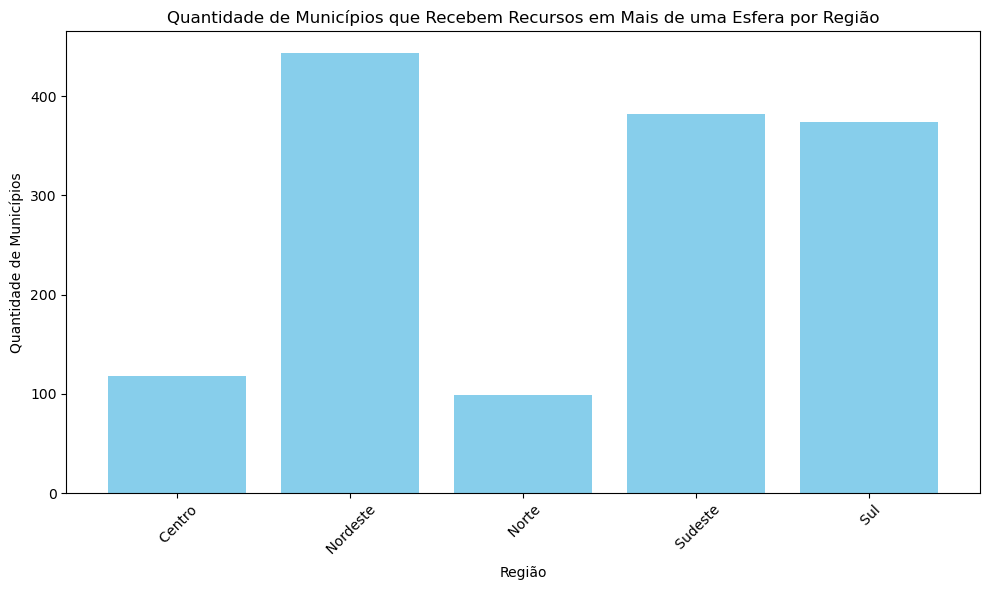

In [82]:
# Agrupar os municípios que recebem mais de um recurso por região
municipios_por_regiao = municipios_mais_de_um_recurso.groupby('Regiao').size().reset_index(name='quantidade')

# Criar um gráfico de barras para visualizar os municípios por região
plt.figure(figsize=(10, 6))
plt.bar(municipios_por_regiao['Regiao'], municipios_por_regiao['quantidade'], color='skyblue')

# Configurar o gráfico
plt.title('Quantidade de Municípios que Recebem Recursos em Mais de uma Esfera por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Municípios')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Análise - Recebimento de Recurso Federal
<hr>

In [64]:
#Vamos fazer o mesmo processo anterior com a coluna: recurso_federal
recurso_federal = data_modificado['recurso_federal']

recebe_recurso_federal = Counter(recurso_federal)
print(recebe_recurso_federal)

Counter({'Não': 3098, 'Sem Dados': 1704, 'Sim': 759, 'Não informou': 9})


In [66]:
#Agora a média
total = len(recurso_federal)

media_recebe = recebe_recurso_federal['Sim']/total
media_nao_recebe = recebe_recurso_federal['Não']/total
media_sem_dados = recebe_recurso_federal['Não informou']/total

print(f"Média que recebe é: {media_recebe:.2f}")
print(f"Média que não recebe é: {media_nao_recebe:.2f}")
print(f"Média que não informou é: {media_sem_dados:}")

Média que recebe é: 0.14
Média que não recebe é: 0.56
Média que não informou é: 0.001615798922800718


### Análise - Recebimento de Recurso Estadual
<hr>

In [68]:
#Vamos fazer o mesmo processo anterior com a coluna: recurso_estadual
recurso_estadual = data_modificado['recurso_estadual']

recebe_recurso_estadual = Counter(recurso_estadual)
print(recebe_recurso_estadual)

Counter({'Sim': 2009, 'Não': 1848, 'Sem Dados': 1704, 'Não informou': 9})


In [70]:
#Agora a média
total = len(recurso_estadual)

media_recebe = recebe_recurso_estadual['Sim']/total
media_nao_recebe = recebe_recurso_estadual['Não']/total
media_sem_dados = recebe_recurso_estadual['Não informou']/total

print(f"Média que recebe é: {media_recebe:.2f}")
print(f"Média que não recebe é: {media_nao_recebe:.2f}")
print(f"Média que não informou é: {media_sem_dados:}")

Média que recebe é: 0.36
Média que não recebe é: 0.33
Média que não informou é: 0.001615798922800718


### Análise - Recebimento de Recurso Municipal
<hr>

In [72]:
#Vamos fazer o mesmo processo anterior com a coluna: recurso_municipal
recurso_municipal = data_modificado['recurso_municipal']

recebe_recurso_municipal = Counter(recurso_municipal)
print(recebe_recurso_municipal)

Counter({'Sim': 2795, 'Sem Dados': 1704, 'Não': 1062, 'Não informou': 9})


In [74]:
#Agora a média
total = len(recurso_municipal)

media_recebe = recebe_recurso_municipal['Sim']/total
media_nao_recebe = recebe_recurso_municipal['Não']/total
media_sem_dados = recebe_recurso_municipal['Não informou']/total

print(f"Média que recebe é: {media_recebe:.2f}")
print(f"Média que não recebe é: {media_nao_recebe:.2f}")
print(f"Média que não informou é: {media_sem_dados:}")

Média que recebe é: 0.50
Média que não recebe é: 0.19
Média que não informou é: 0.001615798922800718


### Análise - Região que mais recebe recurso federal
<hr>

In [76]:
# Agrupar por 'Regiao' e contar os valores na coluna 'recebe_recurso'
quantidade_por_regiao_recurso_federal = data_modificado.groupby(['Regiao', 'recurso_federal']).size()

# Visualizar o resultado
print(quantidade_por_regiao_recurso_federal)

Regiao    recurso_federal
Centro    Não                224
          Não informou         1
          Sem Dados          173
          Sim                 69
Nordeste  Não                964
          Sem Dados          515
          Sim                315
Norte     Não                235
          Não informou         2
          Sem Dados          137
          Sim                 76
Sudeste   Não                878
          Não informou         2
          Sem Dados          629
          Sim                159
Sul       Não                797
          Não informou         4
          Sem Dados          250
          Sim                140
dtype: int64


In [78]:
media_por_regiao = data_modificado.groupby('Regiao')['total_recursos'].mean()
print(media_por_regiao )

Regiao
Centro      0.933619
Nordeste    1.020624
Norte       0.955556
Sudeste     0.891487
Sul         1.157851
Name: total_recursos, dtype: float64


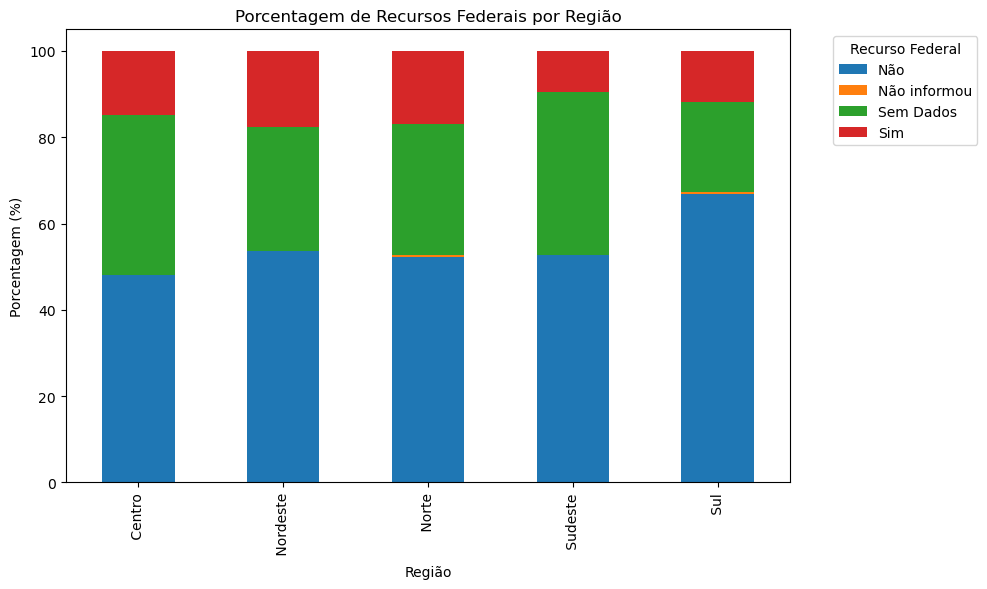

In [80]:
import matplotlib.pyplot as plt

# Agrupar por 'Regiao' e 'recurso_federal' e contar os valores
quantidade_por_regiao_recurso_federal = data_modificado.groupby(['Regiao', 'recurso_federal']).size()

# Transformar em DataFrame para facilitar o processamento
quantidade_por_regiao_recurso_federal = quantidade_por_regiao_recurso_federal.reset_index(name='quantidade')

# Calcular as porcentagens por região
quantidade_por_regiao_recurso_federal['percentual'] = quantidade_por_regiao_recurso_federal.groupby('Regiao')['quantidade'].transform(lambda x: x / x.sum() * 100)

# Criar um gráfico de barras empilhadas para representar as porcentagens
pivot_data = quantidade_por_regiao_recurso_federal.pivot(index='Regiao', columns='recurso_federal', values='percentual')
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar o gráfico
plt.title('Porcentagem de Recursos Federais por Região')
plt.xlabel('Região')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Recurso Federal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Análise Final
<hr>
<p style="text-align: justify;">
Com base nas informações coletadas, tratadas e analisadas, constatou-se que <strong>69%</strong> dos municípios brasileiros receberam algum recurso público em <strong>2023</strong> destinado ao incentivo de Serviços de Assistência Técnica e Extensão Rural para agricultores familiares e povos de comunidades tradicionais. Por outro lado, <strong>31%</strong> dos municípios não receberam nenhum recurso, enquanto uma pequena parcela, correspondente a <strong>0,16%</strong>, não informou se recebeu ou não.
</p>
<p style="text-align: justify;">
A análise também revelou que <strong>1.416</strong> municípios foram beneficiados por recursos provenientes de mais de uma esfera pública (federal, estadual e/ou municipal), evidenciando a integração de esforços entre diferentes níveis de governo para o fomento desses serviços.
</p>
<p style="text-align: justify;">
Além disso, foi identificado que a região <strong>Nordeste</strong> não apenas é a que mais recebe recursos federais, mas também concentra o maior número de municípios que não recebem esse tipo de recurso, demonstrando uma desigualdade interna na distribuição dos recursos públicos.
</p>